In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
movies.shape

(4803, 20)

In [5]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
movies = movies[['id', 'title','genres','popularity','vote_average', 'vote_count']]

In [7]:
movies.head(5)

,id,title,genres,popularity,vote_average,vote_count
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,6.9,4500
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,6.3,4466
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,7.6,9106
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,6.1,2124


In [8]:
movies.isnull().sum()

id              0
title           0
genres          0
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [9]:
from ast import literal_eval
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [10]:
movies.head(5)

,id,title,genres,popularity,vote_average,vote_count
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",139.082615,6.9,4500
2,206647,Spectre,"[Action, Adventure, Crime]",107.376788,6.3,4466
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",112.312950,7.6,9106
4,49529,John Carter,"[Action, Adventure, Science Fiction]",43.926995,6.1,2124


In [11]:
movies['genres'].explode().value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genres, dtype: int64

### IMDB Weighted Rating Formula

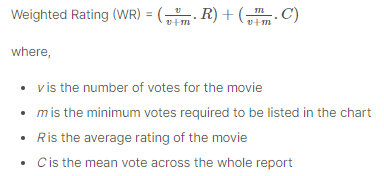

In [12]:
# vote count
# vote average

In [13]:
movies.dtypes

id                int64
title            object
genres           object
popularity      float64
vote_average    float64
vote_count        int64
dtype: object

In [14]:
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')

In [15]:
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')

In [16]:
C = vote_averages.mean()
C

5.6529252550489275

In [18]:
# sns.distplot(movies['vote_count'], kind = 'kde')

In [19]:
movies.describe()

,id,popularity,vote_average,vote_count
count,4803.000000,4803.000000,4803.000000,4803.000000
mean,57165.484281,21.492301,6.092172,690.217989
std,88694.614033,31.816650,1.194612,1234.585891
min,5.000000,0.000000,0.000000,0.000000
25%,9014.500000,4.668070,5.600000,54.000000
50%,14629.000000,12.921594,6.200000,235.000000
75%,58610.500000,28.313505,6.800000,737.000000
max,459488.000000,875.581305,10.000000,13752.000000


In [20]:
m = vote_counts.quantile(0.50)
m

235.0

In [21]:
selected = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())][['id', 'title','genres','popularity','vote_average', 'vote_count']]
selected['vote_count'] = selected['vote_count'].astype('int')
selected['vote_average'] = selected['vote_average'].astype('int')
selected.shape

(2407, 6)

In [22]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [23]:
selected['wr'] = selected.apply(weighted_rating, axis=1)

In [24]:
selected.head(5)

,id,title,genres,popularity,vote_average,vote_count,wr
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,7,11800,6.973697
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",139.082615,6,4500,5.982775
2,206647,Spectre,"[Action, Adventure, Crime]",107.376788,6,4466,5.982650
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",112.312950,7,9106,6.966110
4,49529,John Carter,"[Action, Adventure, Science Fiction]",43.926995,6,2124,5.965425


In [25]:
selected = selected.sort_values('wr', ascending=False)

In [26]:
selected.head(10)

,id,title,genres,popularity,vote_average,vote_count,wr
96,27205,Inception,"[Action, Thriller, Science Fiction, Mystery, A...",167.583710,8,13752,7.960566
65,155,The Dark Knight,"[Drama, Action, Crime, Thriller]",187.322927,8,12002,7.954927
95,157336,Interstellar,"[Adventure, Drama, Science Fiction]",724.247784,8,10867,7.950319
662,550,Fight Club,[Drama],146.757391,8,9413,7.942831
262,120,The Lord of the Rings: The Fellowship of the Ring,"[Adventure, Fantasy, Action]",138.049577,8,8705,7.938304
3232,680,Pulp Fiction,"[Thriller, Crime]",121.463076,8,8428,7.936331
1881,278,The Shawshank Redemption,"[Drama, Crime]",136.747729,8,8205,7.934649
329,122,The Lord of the Rings: The Return of the King,"[Adventure, Fantasy, Action]",123.630332,8,8064,7.933539
809,13,Forrest Gump,"[Comedy, Drama, Romance]",138.133331,8,7927,7.932423
330,121,The Lord of the Rings: The Two Towers,"[Adventure, Fantasy, Action]",106.914973,8,7487,7.928573


In [27]:
# s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
# s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level =1,drop = True)

In [28]:
# s.name = 'genre'

In [29]:
# genre_col = movies.drop('genres', axis=1).join(s)

In [30]:
genre_df = movies.explode('genres')

In [31]:
genre_df.head(10)

,id,title,genres,popularity,vote_average,vote_count
0,19995,Avatar,Action,150.437577,7.2,11800
0,19995,Avatar,Adventure,150.437577,7.2,11800
0,19995,Avatar,Fantasy,150.437577,7.2,11800
0,19995,Avatar,Science Fiction,150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,Adventure,139.082615,6.9,4500
1,285,Pirates of the Caribbean: At World's End,Fantasy,139.082615,6.9,4500
1,285,Pirates of the Caribbean: At World's End,Action,139.082615,6.9,4500
2,206647,Spectre,Action,107.376788,6.3,4466
2,206647,Spectre,Adventure,107.376788,6.3,4466
2,206647,Spectre,Crime,107.376788,6.3,4466


In [48]:
def recommend_on_genre(genre, percentile=0.85):
    df = genre_df[genre_df['genres'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    selected = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['id', 'title','popularity','vote_average', 'vote_count']]
    selected['vote_count'] = selected['vote_count'].astype('int')
    selected['vote_average'] = selected['vote_average'].astype('int')
    
    selected['wr'] = selected.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    selected = selected.sort_values(['wr'], ascending=False).head(50)
    
    return selected

In [51]:
recommend_on_genre("Romance")

,id,title,popularity,vote_average,vote_count,wr
809,13,Forrest Gump,138.133331,8,7927,7.766263
25,597,Titanic,100.025899,7,7562,6.864585
81,102651,Maleficent,110.620647,7,4496,6.787914
1997,152601,Her,53.682367,7,4097,6.771045
49,64682,The Great Gatsby,61.196071,7,3769,6.755026
2838,222935,The Fault in Our Stars,74.358971,7,3759,6.754503
2152,38,Eternal Sunshine of the Spotless Mind,56.481487,7,3652,6.748756
2108,162,Edward Scissorhands,47.513630,7,3601,6.745921
1695,812,Aladdin,92.982009,7,3416,6.735079
2547,266856,The Theory of Everything,61.182331,7,3311,6.728503
